In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline


crossectional_area = (0.00754 * 0.0401) # dalam satuan meter
initial_length = 0.3

print(crossectional_area)

0.00030235399999999996


In [73]:

# Membaca file CSV dengan melewati baris pertama dan kedua, serta tanpa header otomatis
data = pd.read_csv("KEL 2A_1.csv", skiprows=[0, 1], header=None)

# Menambahkan nama kolom
data.columns = ['Displacement', 'Force']
# Menghapus tanda kutip dari setiap nilai dalam kolom, jika ada, lalu mengonversi ke float
data['Displacement'] = data['Displacement'].astype(str).str.replace('"', '').astype(float)
data['Force'] = data['Force'].astype(str).str.replace('"', '').astype(float)

data['Force'] = data['Force'] * 1000

# mengubah satuan displacement menjadi meter
data['Displacement'] = data['Displacement'] / 1000


# Menampilkan hasilnya
print(data)
data.describe()


       Displacement    Force
0      0.000000e+00      6.9
1      0.000000e+00      7.6
2      4.000000e-07     20.5
3      1.500000e-06     96.1
4      2.500000e-06    185.3
...             ...      ...
28817  4.800140e-02  92863.3
28818  4.800150e-02  89082.1
28819  4.800170e-02  85274.6
28820  4.800190e-02  81469.8
28821  4.800210e-02  77686.4

[28822 rows x 2 columns]


,Displacement,Force
count,28822.000000,28822.000000
mean,0.024014,159399.351311
std,0.013867,23094.364877
min,0.000000,6.900000
25%,0.012005,154036.400000
50%,0.024014,167459.750000
75%,0.036023,172728.525000
max,0.048002,173793.700000


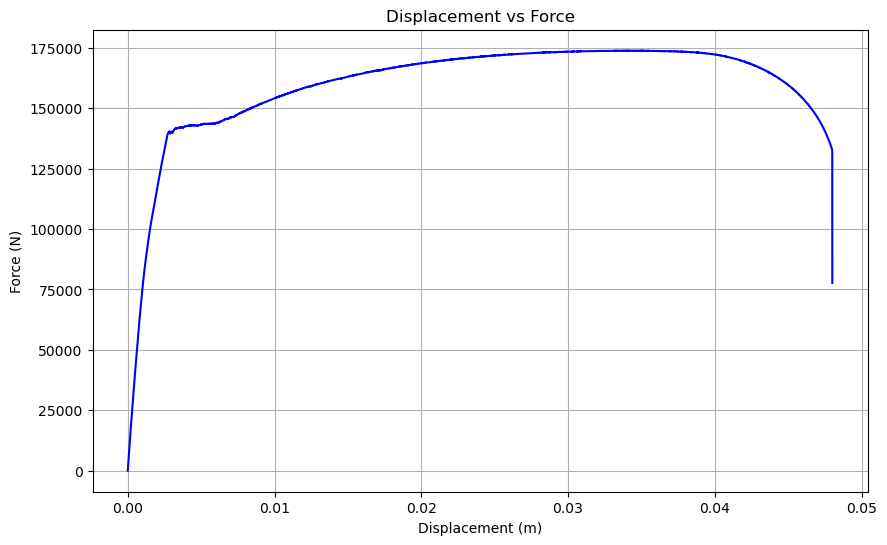

Displacement         0.048002
Force           173793.700000
dtype: float64

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(data['Displacement'], data['Force'], marker='o', color='b', linestyle='-', markersize=0.0001)
plt.title("Displacement vs Force")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")
plt.grid(True)
plt.show()

data.max()

             Stress    Strain
0      2.282093e+04  0.000000
1      2.513610e+04  0.000000
2      6.780132e+04  0.000001
3      3.178394e+05  0.000005
4      6.128578e+05  0.000008
...             ...       ...
28817  3.071344e+08  0.160005
28818  2.946285e+08  0.160005
28819  2.820356e+08  0.160006
28820  2.694517e+08  0.160006
28821  2.569386e+08  0.160007

[28822 rows x 2 columns]


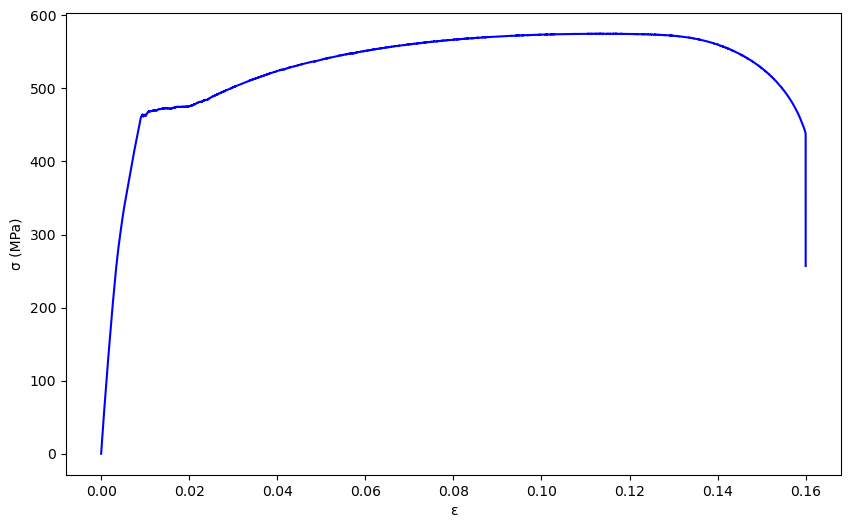

In [75]:
stress = data["Force"]/crossectional_area # N/m^2  = Pa
strain = (data["Displacement"])/initial_length # m/m = .



stress_strain = pd.DataFrame({'Stress':stress,'Strain':strain})
print(stress_strain)
plt.figure(figsize=(10, 6))
plt.plot(stress_strain['Strain'], stress_strain['Stress'] * (10**-6), marker='o', color='b', linestyle='-', markersize=0.0001)
plt.xlabel("ɛ")
plt.ylabel("σ (MPa)")
plt.show()

            Stress    Strain
0     2.282093e+04  0.000000
1     2.513610e+04  0.000000
2     6.780132e+04  0.000001
3     3.178394e+05  0.000005
4     6.128578e+05  0.000008
...            ...       ...
1439  4.291460e+08  0.007983
1440  4.292756e+08  0.007988
1441  4.294638e+08  0.007994
1442  4.296847e+08  0.008000
1443  4.298832e+08  0.008006

[1444 rows x 2 columns]


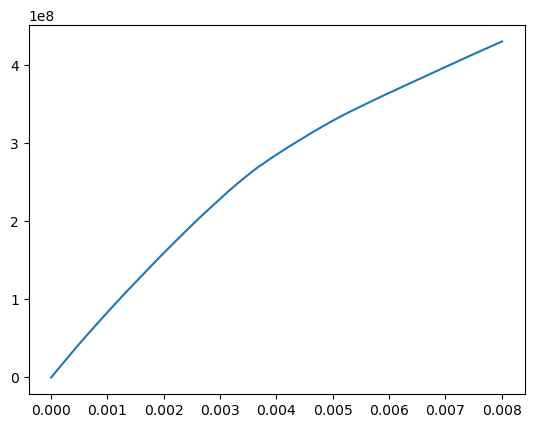

In [76]:

"""
terlihat bahwa daerah elastis berada di sekitar stress < 0.05 dan strain < 430 Mpa
"""

elastic_region = stress_strain.loc[(stress_strain['Stress']  < 430*(10**6)) & (stress_strain['Strain']<0.012)]
print(elastic_region)
plt.plot(elastic_region['Strain'], elastic_region['Stress'], label="Data Elastic Region", markersize=2)
plt.show()

            Stress    Strain
0     2.282093e+04  0.000000
1     2.513610e+04  0.000000
2     6.780132e+04  0.000001
3     3.178394e+05  0.000005
4     6.128578e+05  0.000008
...            ...       ...
1439  4.291460e+08  0.007983
1440  4.292756e+08  0.007988
1441  4.294638e+08  0.007994
1442  4.296847e+08  0.008000
1443  4.298832e+08  0.008006

[1444 rows x 2 columns]


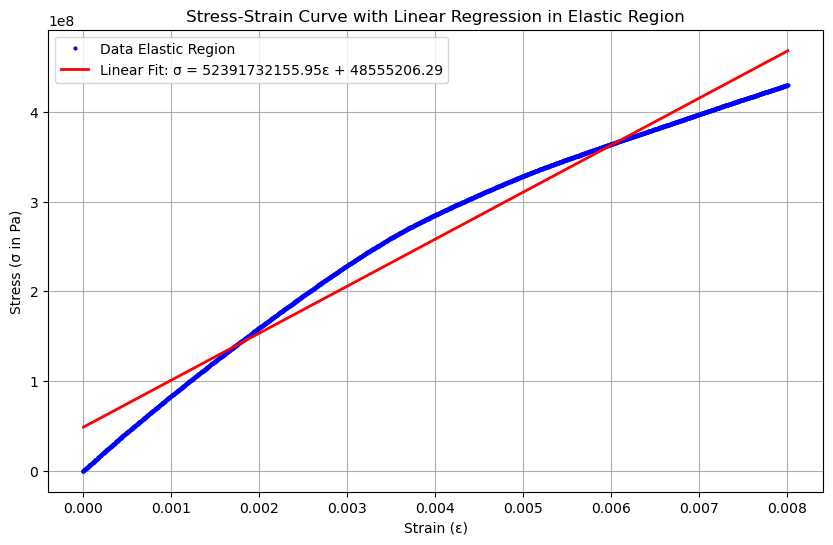

Slope (Elastic Modulus) = 52391732155.95 Pa
Intercept = 48555206.29 Pa


In [77]:

print(elastic_region)

# Melakukan regresi linear pada data elastis
slope, intercept = np.polyfit(elastic_region['Strain'], elastic_region['Stress'], 1)

# Menghitung nilai Stress yang diprediksi dari hasil regresi linear
stress_fit = slope * elastic_region['Strain'] + intercept

# Plot data asli dan garis regresi linear
plt.figure(figsize=(10, 6))
plt.plot(elastic_region['Strain'], elastic_region['Stress'], 'bo', label="Data Elastic Region", markersize=2)
plt.plot(elastic_region['Strain'], stress_fit, 'r-', label=f"Linear Fit: σ = {slope:.2f}ε + {intercept:.2f}", linewidth=2)

# Menambahkan label dan judul
plt.xlabel("Strain (ɛ)")
plt.ylabel("Stress (σ in Pa)")
plt.title("Stress-Strain Curve with Linear Regression in Elastic Region")
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

# Menampilkan hasil slope dan intercept
print(f"Slope (Elastic Modulus) = {slope:.2f} Pa")
print(f"Intercept = {intercept:.2f} Pa")